# 안전 운전자 예측

### 데이터 둘러보기

In [2]:
import pandas as pd

In [3]:
## 데이터 불러오기
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [10]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [11]:
train.shape, test.shape

((595212, 59), (892816, 58))

In [12]:
train.info()
# 결측값이 모두 없다고 나오지만 결측값에 -1이 입력되어 있기 때문에 그렇게 나오는 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

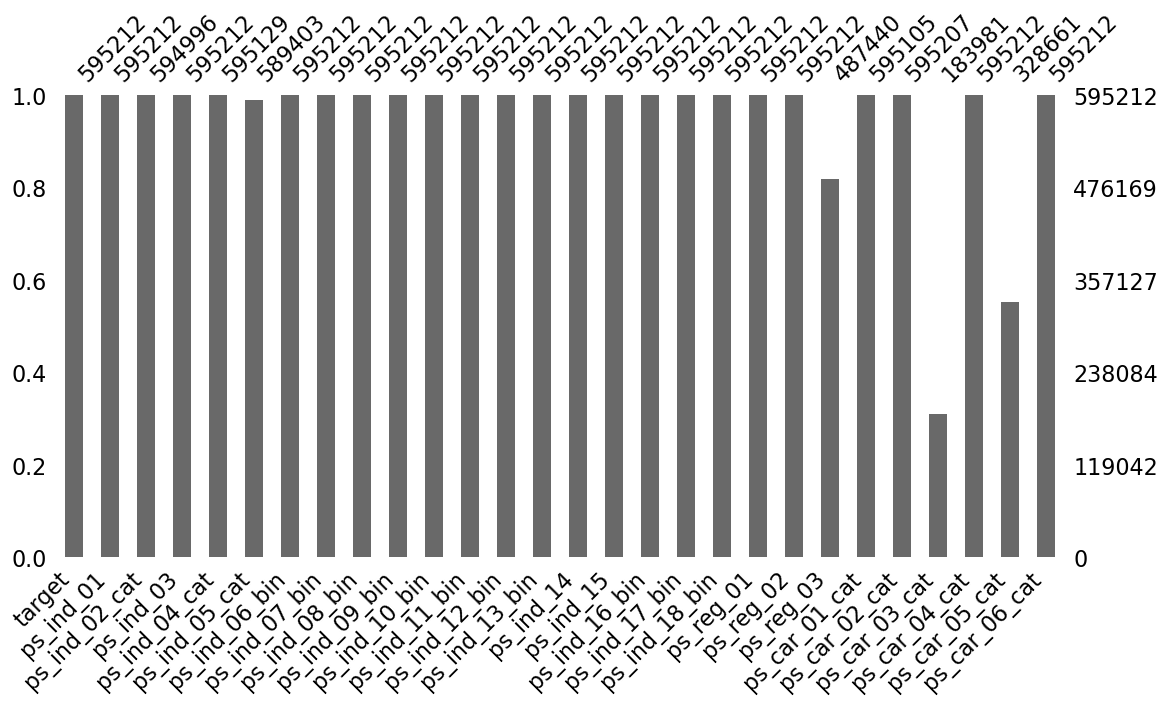

In [17]:
!pip install missingno
import missingno as msno
import numpy as np

train_copy = train.copy().replace(-1, np.NaN)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6)); # 28개만
# ps_reg_03, ps_car_03_cat, ps_car_05_cat 결측값

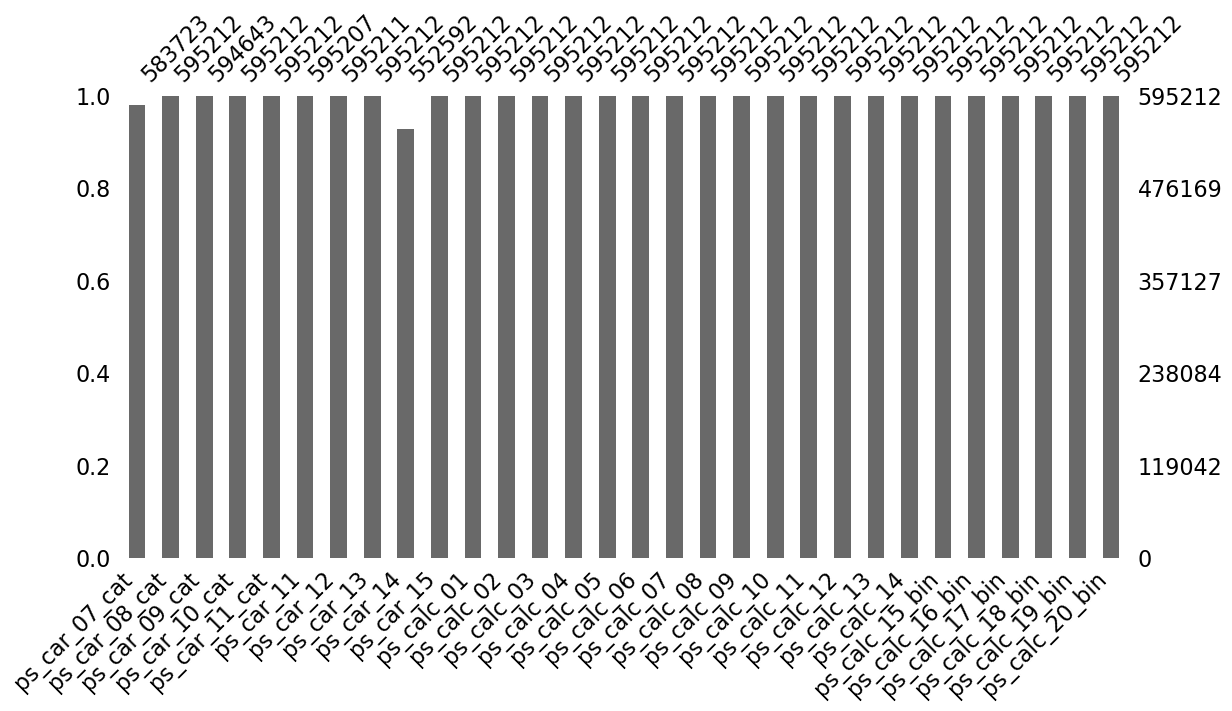

In [18]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6)); # 나머지

### 피처 요약표

In [26]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형' # 순서가 없는 데이터
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [27]:
summary = resumetable(train)
summary

데이터 세트 형상: (595212, 59)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
id,int64,0,595212,순서형
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형


### 데이터 시각화

In [23]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그림을 보게해줌

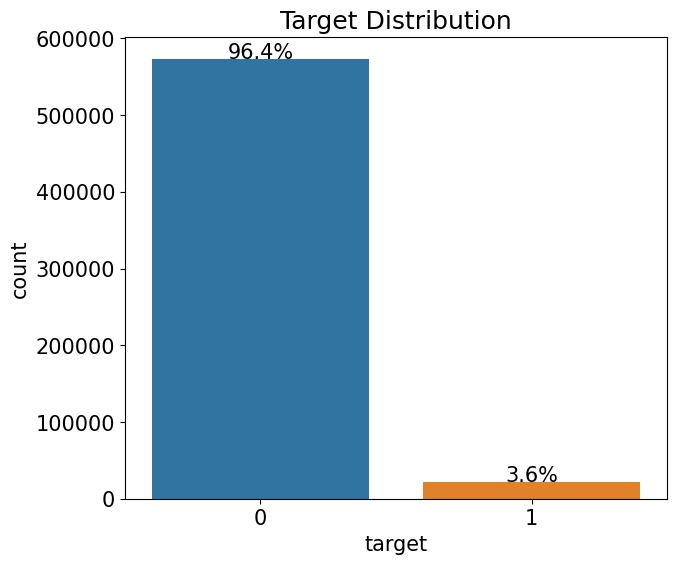

In [24]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬

mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

- 타깃값이 불균형함 -> 비율이 작은 타깃값 1을 잘 예측하는 것이 중요
- 피처의 고윳값마다 타깃값 비율이 다르면 유의미한 결과이므로 각각의 타깃값 1의 비율을 알아보고, 신뢰구간이 너무 넓으면 통계적 유효성이 떨어지므로 불필요한 피처로 판단
<br>-> *즉, 고윳값 별로 타깃값 1 비율이 차이가 나고, 신뢰구간이 작은 피처를 남기자*

In [28]:
## 고윳값 별 타깃값 비율
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    grid = gridspec.GridSpec(num_rows, num_cols) 
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

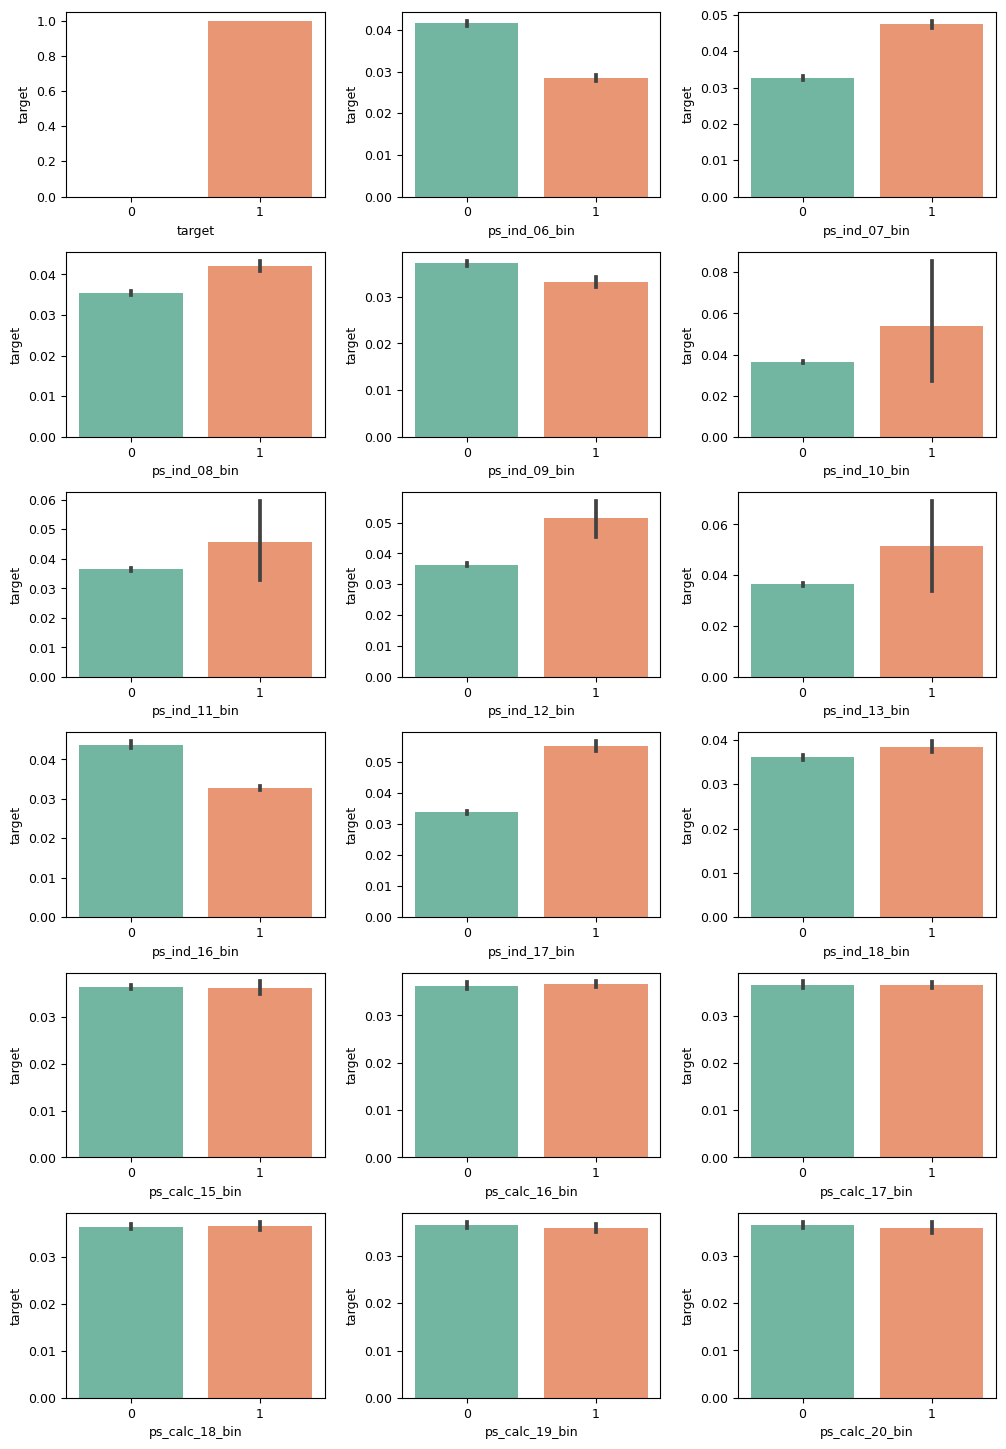

In [29]:
## 이진 피처
bin_features = summary[summary['데이터 종류'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

- 신뢰구간이 넓은 bin 10-13, 타깃값 비율 차이가 적은 calc 15-20은 제거

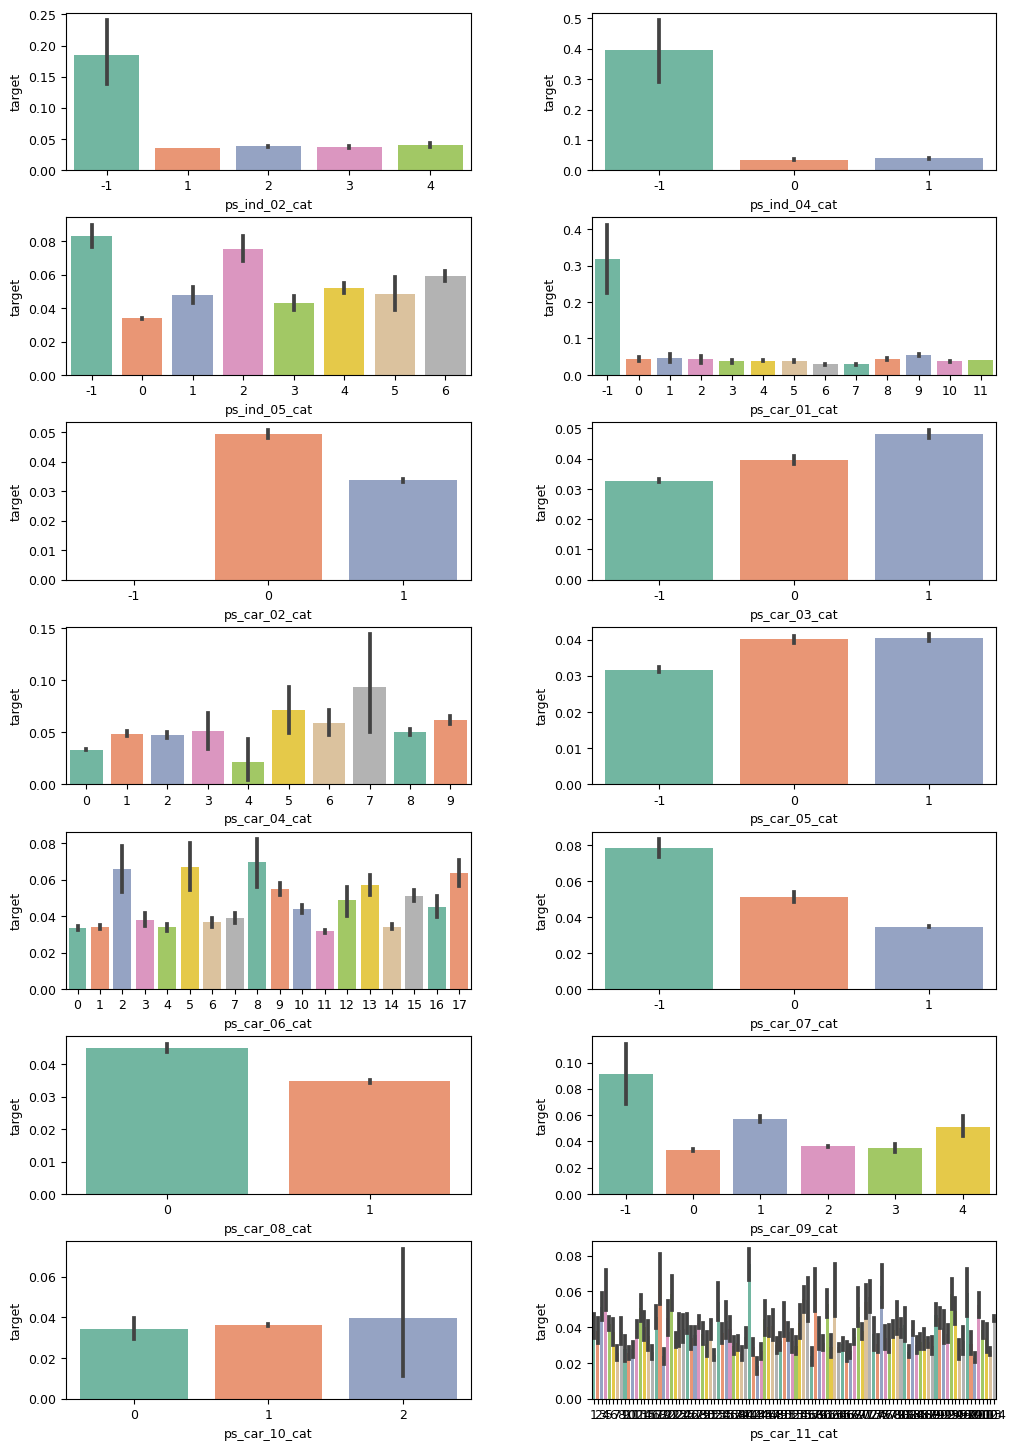

In [31]:
## 명목형 피처
nom_features = summary[summary['데이터 종류'] == '명목형'].index
plot_target_ratio_by_features(train, nom_features, 7, 2)

- 결측값이 타깃값에 유의미한 예측력이 있을 경우 그대로 두고 모델링
- 애매한 피처의 경우 제거 후와 제거 전의 성능을 비교

In [ ]:
## 순서형 피처
ord_features = summary[summary['데이터 종류'] == '순서형'].index
plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

- ind_14 피처의 경우 고윳값 4의 신뢰구간이 너무 크고, calc 04-14의 경우 신뢰구간이 크거나 타깃값 비율의 차이가 별로 없어 제거

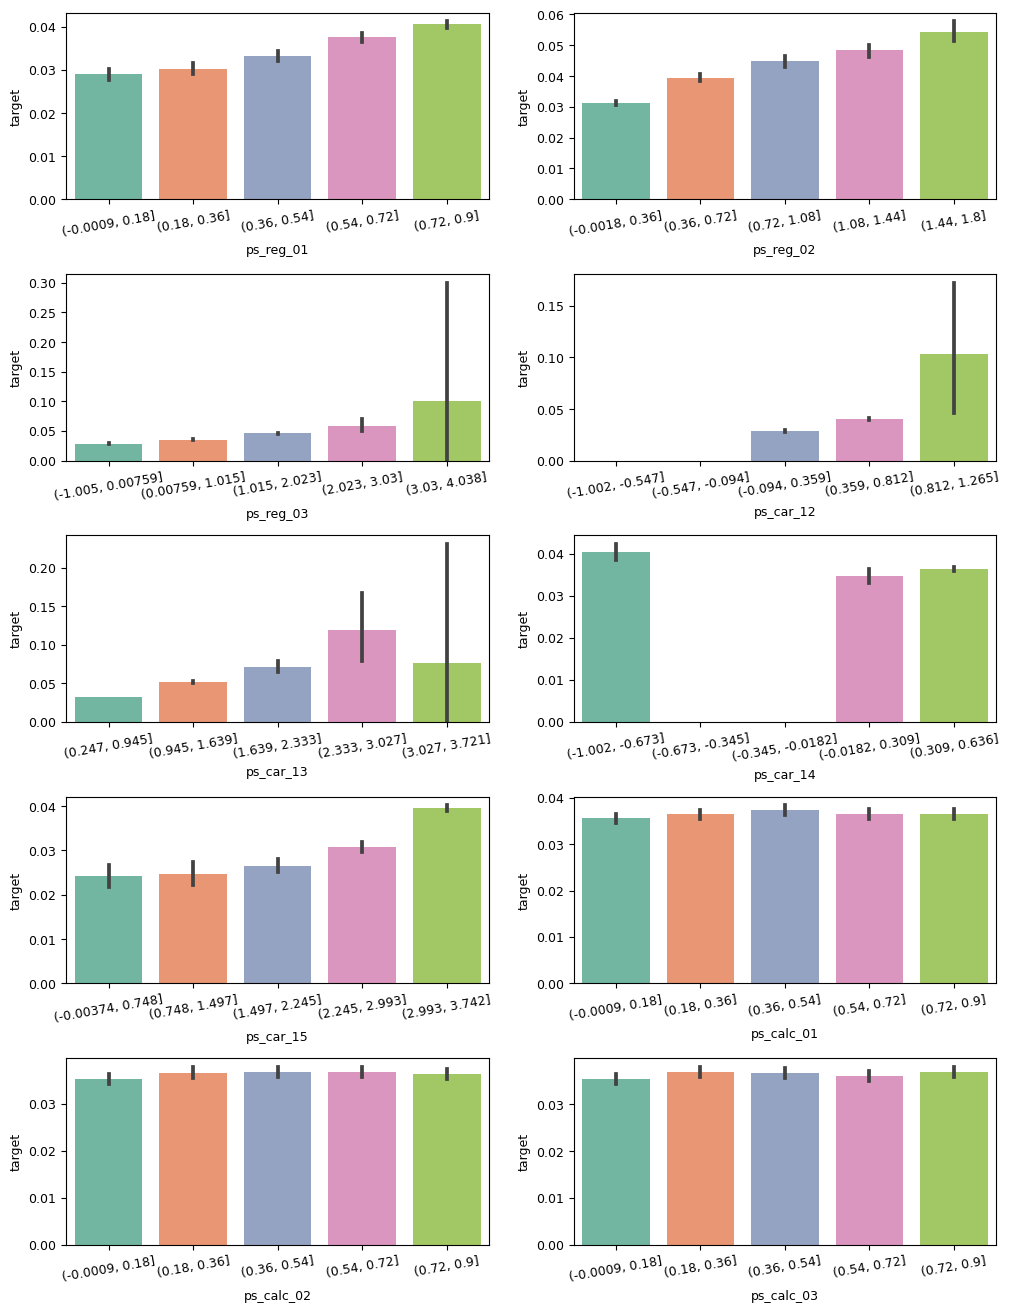

In [34]:
## 연속형 피처
cont_features = summary[summary['데이터 종류'] == '연속형'].index

plt.figure(figsize=(12, 16))                
grid = gridspec.GridSpec(5, 2)              
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) 

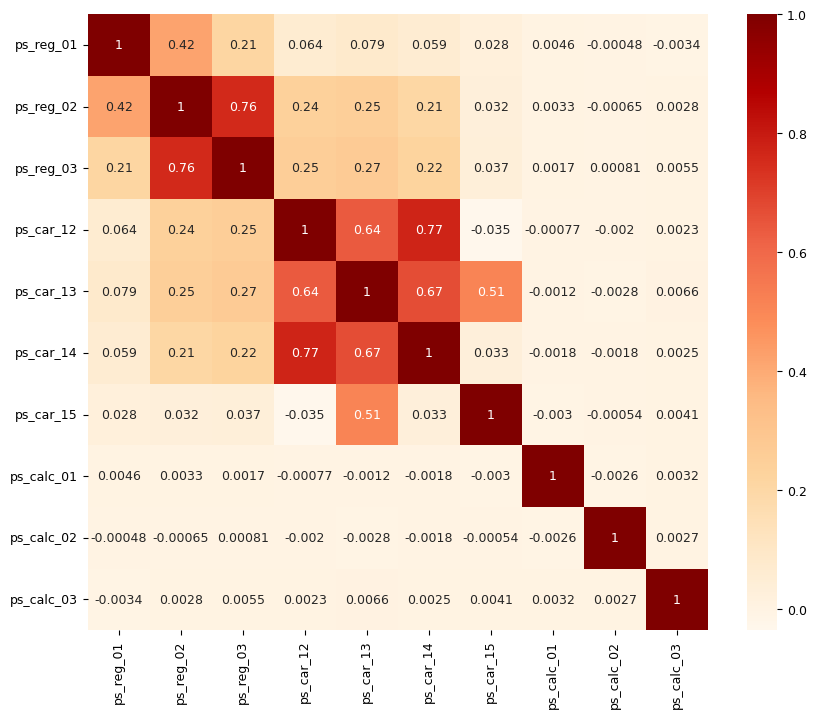

In [35]:
## 연속형 피처 간 상관관계 히트맵
train_copy = train_copy.dropna()

plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()    
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

- 강한 상관관계를 보이는 두 피처가 동시에 존재하면 성능이 떨어질 수도 있음
- car_12와 car_14, reg_02와 reg_03이 강한 상관관계를 보이는데, 테스트 결과 car_14를 제거하는 것이 성능이 좋았음

### 베이스라인 모델 - LightGBM

In [96]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [97]:
## 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

In [98]:
## 명목형 피처 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [99]:
## 필요없는 피처 제거
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# 명목형 피처, calc 분류의 피처, 제거할 피처를 제외한 피처
remaining_features = [f for f in all_features 
                      if ('cat' not in f and 
                          'calc' not in f and 
                          f not in drop_features)]

# 원핫인코딩한 명목형 피처 + remaining features
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format='csr')

In [100]:
## 훈련 데이터 테스트 데이터 분리
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [196]:
## 평가지표 계산 함수 - 정규화된 지니계수
# 예측값에 대한 지니계수 / 예측이 완벽할 때 지니계수 -> 0에 가까울수록 성능이 나쁘고 1에 가까울수록 좋음
def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      
    L_mid = np.linspace(1 / n_samples, 1, n_samples)

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] 
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)      

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] 
    L_true = np.cumsum(true_order) / np.sum(true_order) 
    G_true = np.sum(L_mid - L_true)       

    # 정규화된 지니계수
    return G_pred / G_true

## 평가지표 이름과 평가점수 반환 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 평가점수가 높을수록 좋으므로 마지막 반환값 True로 고정

In [102]:
## 모델 훈련
from sklearn.model_selection import StratifiedKFold

# K 폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# LightGBM 하이퍼파라미터 설정
params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

# 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

In [114]:
import lightgbm as lgb

# OOF 예측 방식: k개의 그룹으로 교차 검증을 수행하면서 각 폴드별로 여러 번 예측해 평균을 내는 방식 (오버피팅 방지, 앙상블 효과)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드 구분 문구
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # 데이터셋 생성 
    dtrain = lgb.Dataset(X_train, y_train) # 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # 검증 데이터셋

    # 모델 훈련 
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=1000, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 평가지표
                          #early_stopping_rounds=100, # 조기종료 조건
                          callbacks=[lgb.early_stopping(stopping_rounds=100)])
                          #verbose_eval=100)     # 100번째마다 성능 평가점수를 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1350
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[891]	valid_0's binary_logloss: 0.151649	valid_0's gini: 0.29011
폴드 1 지니계수 : 0.2901101581027452

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[L

In [115]:
# 실제 타깃값과 비교
print('OOF 검증 데이터 지니계수:', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수: 0.2802369580498456


### 성능 개선 1: LightGBM 모델

In [116]:
## 피처 엔지니어링 - 파생 피처 추가
# 1. 데이터 하나당 결측값 개수
all_data['num_missing'] = (all_data==-1).sum(axis=1)

# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [117]:
# 2. 분류가 ind인 피처를 모두 연결
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [118]:
# 3. 명목형 피처의 고윳값별 개수 + mix_ind
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [120]:
# remaining_features, cat_count_features에서 drop_features를 제거한 데이터 (이미 위에서 제거)
all_data_remaining = all_data[remaining_features+cat_count_features]

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [121]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [197]:
## 하이퍼파라미터 조정 - 베이지안 최적화
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

# 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 고정 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

In [198]:
## 평가지표 계산 함수
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):

    # 하이퍼파라미터 
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정 하이퍼파라미터
    params.update(fixed_params)

    print('하이퍼파라미터:', params)    

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                          #early_stopping_rounds=300, 
                          callbacks=[lgb.early_stopping(stopping_rounds=300)])
                          #verbose_eval=100)    
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [199]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,      
                                 pbounds=param_bounds,
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Training until validation scores don't improve for 300 rounds
Earl

[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[1770]	valid_0's binary_logloss: 0.151004	valid_0's gini: 0.2837
지니계수 : 0.28369982557477474

| 8         | 0.2837    | 0.6       | 0.6       | 0.7       | 1.0       | 10.0      | 34.8      | 35.98     |
하이퍼파라미터: {'num_leaves': 40, 'lambda_l1': 0.9, 'lambda_l2': 0.9610195229938473, 'feature_fraction': 0.692526103076754, 'bagging_fraction': 0.9, 'min_child_samples': 6, 'min_child_weight': 34.193577103234766, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info]

In [200]:
# 최적 하이퍼파라미터 (지니계수가 최대일 때)
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9.112627003799401,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 39.78618342232764}

In [201]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [202]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)
max_params

{'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 40,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

In [203]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0]) 
oof_test_preds_lgb = np.zeros(X_test.shape[0]) 

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    dtrain = lgb.Dataset(X_train, y_train) 
    dvalid = lgb.Dataset(X_valid, y_valid)

    # 모델 훈련 
    lgb_model = lgb.train(params=max_params,        
                          train_set=dtrain,     
                          num_boost_round=1000, 
                          valid_sets=dvalid,    
                          feval=gini,           
                          #early_stopping_rounds=100, 
                          callbacks=[lgb.early_stopping(stopping_rounds=100)])
                          #verbose_eval=100)    

    oof_test_preds_lgb += lgb_model.predict(X_test)/folds.n_splits

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1817
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.151506	valid_0's gini: 0.295155
폴드 1 지니계수 : 0.2951547084157351

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initsco

In [204]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.28525250732671636


### 성능 개선 2: XGBOOST 모델

- 트리 기반 부스팅 알고리즘

In [205]:
import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [206]:
## 피처 엔지니어링 - 파생 피처 추가
# 1. 데이터 하나당 결측값 개수
all_data['num_missing'] = (all_data==-1).sum(axis=1)

# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

# 2. 분류가 ind인 피처를 모두 연결
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

# 3. 명목형 피처의 고윳값별 개수 + mix_ind
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터 (이미 위에서 제거)
all_data_remaining = all_data[remaining_features+cat_count_features]

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [207]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [208]:
# XGBoost용 지니 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [209]:
## XGBoost용 데이터셋
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [210]:
## 하이퍼파라미터 설정
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

In [211]:
## 평가지표 계산 함수
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):
    
    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'gamma': gamma,
              'reg_alpha':reg_alpha,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    params.update(fixed_params)

    print('하이퍼파라미터 :', params)    

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params, 
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')], # 검증 데이터를 전달받음
                          maximize=True, # 평가점수가 크면 좋다는 것을 의미
                          custom_metric=gini, # feval 함수 대신 custom_metric 쓰라고 함
                          early_stopping_rounds=200,
                          verbose_eval=False)

    best_iter = xgb_model.best_iteration

    # 성능이 가장 좋을 때 부스팅 반복 횟수를 예측 시에 파라미터로 명시해야 함
    preds = xgb_model.predict(bayes_dvalid, 
                              iteration_range=(0, best_iter))

    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [212]:
## 베이지안 최적화 수행
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function, 
                                 pbounds=param_bounds, 
                                 random_state=0)

optimizer.maximize(init_points=3, n_iter=6)

# 오류: callback must be an instance of `TrainingCallback`
# -> pip install git+https://github.com/optuna/optuna.git

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.8675319002346239, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.27660992349579144

| 1         | 0.2766    | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.

In [213]:
## 하이퍼파라미터 출력
max_params = optimizer.max['params']

In [214]:
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params.update(fixed_params)

max_params

{'colsample_bytree': 1.0,
 'gamma': 8.0,
 'max_depth': 8,
 'min_child_weight': 5.0,
 'reg_alpha': 7.0,
 'reg_lambda': 1.1,
 'scale_pos_weight': 1.4,
 'subsample': 0.6,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

In [215]:
## 모델 훈련
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0]) 
oof_test_preds_xgb = np.zeros(X_test.shape[0]) 

# OOF 방식
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋 생성 
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params, 
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          custom_metric=gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수
    best_iter = xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds_xgb += xgb_model.predict(dtest, iteration_range=(0, best_iter))/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[0]	valid-logloss:0.21709	valid-gini:0.20055
[100]	valid-logloss:0.15965	valid-gini:0.27354
[200]	valid-logloss:0.15458	valid-gini:0.28589
[300]	valid-logloss:0.15387	valid-gini:0.29159
[400]	valid-logloss:0.15375	valid-gini:0.29340
[500]	valid-logloss:0.15371	valid-gini:0.29424
[600]	valid-logloss:0.15368	valid-gini:0.29451
[700]	valid-logloss:0.15368	valid-gini:0.29471
[800]	valid-logloss:0.15366	valid-gini:0.29516
[900]	valid-logloss:0.15367	valid-gini:0.29536
[1000]	valid-logloss:0.15365	valid-gini:0.29550
[1100]	valid-logloss:0.15364	valid-gini:0.29558
[1200]	valid-logloss:0.15366	valid-gini:0.29564
[1300]	valid-logloss:0.15365	valid-gini:0.29562
[1349]	valid-logloss:0.15364	valid-gini:0.29563
폴드 1 지니계수 : 0.295669624353479

######################################## 폴드 2 / 폴드 5 ########################################
[0]	valid-logloss:0.21709	valid-gini:0.19319
[100]	valid-logloss:0.15986	

In [216]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))
# lightgbm보다 지니계수가 아주 조금 높아짐 0.0007정도..

OOF 검증 데이터 지니계수 : 0.285942671236618


### 성능 개선 3: LightGBM과 XGBoost 앙상블

In [220]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5

In [223]:
sample_submission['target'] = oof_test_preds
sample_submission.to_csv('submission.csv')